# Section3 線形回帰

# 最急降下法のスクラッチ実装

## データ準備

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sample_data.csv')

In [3]:
df.head()

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674


In [4]:
df.shape

(10, 2)

## データ可視化

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='space', ylabel='rent'>

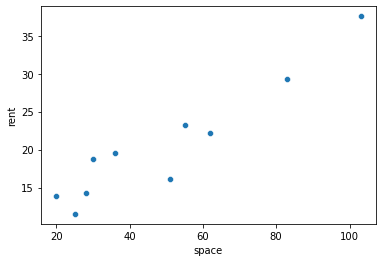

In [6]:
sns.scatterplot(x='space', y='rent', data=df)

## 損失関数の定義

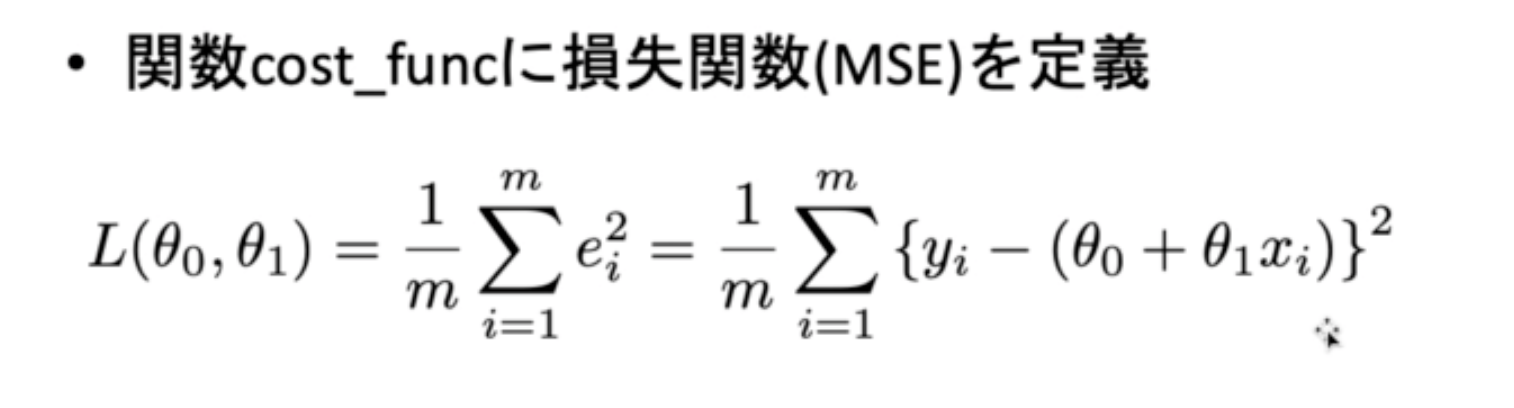

In [7]:
import numpy as np

In [8]:
# pandasのSeries型->numpy　arrayに型変更
x = df['space'].values
y = df['rent'].values

In [9]:
x

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103])

In [10]:
2 + 3 * x

array([ 62,  77,  86,  92, 110, 155, 167, 188, 251, 311])

In [11]:
theta_0 = 2
theta_1 = 3
y - (theta_0 + theta_0 * x)

array([ -28.0411763 ,  -40.46619504,  -43.73045271,  -43.2773204 ,
        -54.39732603,  -87.93183364,  -88.81640141, -103.78740496,
       -138.64298989, -170.43487116])

In [12]:
# 損失関数の定義
def cost_func(theta_0, theta_1, x, y):
    return np.mean(np.square(y - (theta_0 + theta_1 * x)))

In [13]:
cost_func(5, 7, x=x, y=y)

138703.20244638805

## 損失関数可視化

In [14]:
import matplotlib.pyplot as plt

In [15]:
X = np.array([[1, 2, 3, 4], 
              [1, 2, 3, 4], 
              [1, 2, 3, 4], 
              [1, 2, 3, 4]])
Y = np.array([[10, 10, 10, 10], 
              [20, 20, 20, 20], 
              [30, 30, 30, 30], 
              [40, 40, 40, 40]])
Z = np.array([[10, 20, 30, 40], 
              [20, 40, 60, 80], 
              [30, 60, 90, 120], 
              [40, 80, 120, 160]])

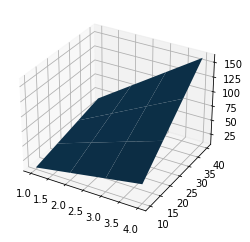

In [16]:
ax = plt.axes(projection='3d')
ax.plot_surface(X=X.T, Y=Y.T, Z=Z)

### X,Y,Zをnumpyで作成

In [17]:
# 上記の2次元空間(X,Y)を作成するnumpyのメソッド： np.meshgrid
x = np.array([1, 2, 3, 4])
y = np.array([10, 20, 30, 40])
X, Y = np.meshgrid(x, y)

In [18]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [19]:
Y

array([[10, 10, 10, 10],
       [20, 20, 20, 20],
       [30, 30, 30, 30],
       [40, 40, 40, 40]])

In [20]:
# ZはXとYの総当たりの掛け算
# イテレータのproductメソッドを使うのが良い
from itertools import product
product(x, y)  # イテレータはイテレータを返す

In [21]:
iter(product(x, y))

In [22]:
list(product(x, y))

[(1, 10),
 (1, 20),
 (1, 30),
 (1, 40),
 (2, 10),
 (2, 20),
 (2, 30),
 (2, 40),
 (3, 10),
 (3, 20),
 (3, 30),
 (3, 40),
 (4, 10),
 (4, 20),
 (4, 30),
 (4, 40)]

In [23]:
z = [x*y for x, y in product(x, y)]

In [24]:
z

[10, 20, 30, 40, 20, 40, 60, 80, 30, 60, 90, 120, 40, 80, 120, 160]

In [25]:
# zをreshapeして4*4のアレイにする
z = [x*y for x, y in product(x, y)]
Z = np.array(z).reshape(4, 4)

In [26]:
Z

array([[ 10,  20,  30,  40],
       [ 20,  40,  60,  80],
       [ 30,  60,  90, 120],
       [ 40,  80, 120, 160]])

In [27]:
X.T

array([[1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3],
       [4, 4, 4, 4]])

In [28]:
Y.T

array([[10, 20, 30, 40],
       [10, 20, 30, 40],
       [10, 20, 30, 40],
       [10, 20, 30, 40]])

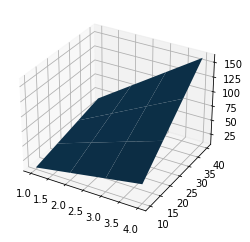

In [29]:
ax = plt.axes(projection='3d')
ax.plot_surface(X=X.T, Y=Y.T, Z=Z)

### 損失関数の可視化

In [30]:
x = df['space'].values
y = df['rent'].values

import matplotlib.pyplot as plt
from itertools import product

n0 = n1 = 300

min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)
theta_0_ax ,theta_1_ax = np.meshgrid(theta_0, theta_1)
product(theta_0, theta_1)
z = [cost_func(param[0], param[1], x=x, y=y) for param in list(product(theta_0, theta_1))]
Z = np.array(z).reshape(n0, n1)

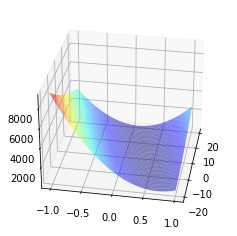

In [31]:
# 損失関数可視化
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)
# 見やすい位置に変更
plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

In [32]:
theta_0[0:4]

array([-20.        , -19.86622074, -19.73244147, -19.59866221])

In [33]:
theta_0.shape

(300,)

In [34]:
theta_0_ax

array([[-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
         19.86622074,  20.        ],
       [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
         19.86622074,  20.        ],
       [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
         19.86622074,  20.        ],
       ...,
       [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
         19.86622074,  20.        ],
       [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
         19.86622074,  20.        ],
       [-20.        , -19.86622074, -19.73244147, ...,  19.73244147,
         19.86622074,  20.        ]])

In [35]:
theta_0_ax.shape

(300, 300)

In [36]:
list(product(theta_0, theta_1))[0:5]

[(-20.0, -1.0),
 (-20.0, -0.9933110367892977),
 (-20.0, -0.9866220735785953),
 (-20.0, -0.979933110367893),
 (-20.0, -0.9732441471571907)]

In [37]:
len(list(product(theta_0, theta_1)))

90000

In [38]:
len(z)

90000

In [39]:
Z.shape

(300, 300)

## 最急降下法

- θ0とθ1の初期値を設定
- パラメータ更新の関数の定義
- イテレーション数や学習率αを設定（α=0.0005)
- イテレーションによりθ0やθ1を更新し、その履歴を保存する

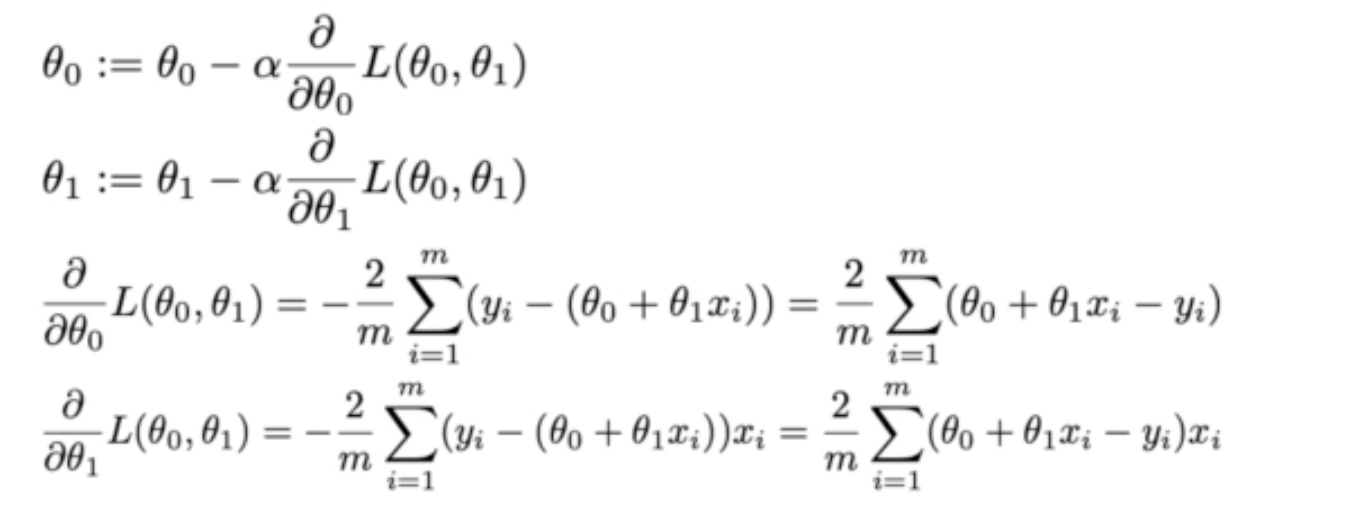

### θ0とθ1の初期値を更新

In [40]:
# theta_0_initをランダムに取る場合
# np.random.seed(0)
# theta_0_init = np.random.uniform(min_0, max_0)
# theta_1_init = np.random.uniform(min_1, max_1)

# 今回はtheta_0_init初期値を設定しておく
theta_0_init = -5
theta_1_init = -0.5

In [41]:
theta_0_init

-5

### パラメータ更新の関数の定義

In [42]:
def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)

def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)

In [43]:
update_theta0(theta_0_init, theta_1_init, x=x, y=y, alpha=0.00005)

-4.994970259715448

In [44]:
update_theta1(theta_0_init, theta_1_init, x=x, y=y, alpha=0.00005)

-0.2003645901822223

### イテレーション数や学習率αを設定

In [45]:
# 機械学習ではイテレーションで学習していく各1回の回数をエポックスと呼ぶ
# つまり、ｅｐｏｃｈsは学習の回数
epochs = 100000  # 10万回
alpha = 0.00005

# theta_0とtheta_1を格納するリスト
theta_0_hist = []
theta_1_hist = []
# 初期化
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
    # theta_0とtheta_1に格納するのは、theta_0_hist,theta_1_histの最後の値[-1]
    updated_theta0 = update_theta0(theta_0=theta_0_hist[-1], theta_1=theta_1_hist[-1], x=x, y=y, alpha=alpha)
    updated_theta1 = update_theta1(theta_0=theta_0_hist[-1], theta_1=theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(updated_theta0)
    theta_1_hist.append(updated_theta1)    

In [46]:
theta_0_hist[0:10]

[-5,
 -4.994970259715448,
 -4.991418224975326,
 -4.988886091809614,
 -4.987057887798836,
 -4.985715531457436,
 -4.984708504792658,
 -4.98393292156176,
 -4.983317080360577,
 -4.98281149348771]

In [47]:
theta_1_hist[0:10]

[-0.5,
 -0.2003645901822223,
 0.0064399475330922384,
 0.1491734042505736,
 0.2476855440024425,
 0.3156765056631919,
 0.3626020089519943,
 0.39498831146569857,
 0.41733978087650486,
 0.4327652935695803]

In [48]:
# 最終的にどこに行き着いたか？(最小値はどこか？)
# 3D図で描画した図で最小値を確認すると大体合っていそうに見える
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


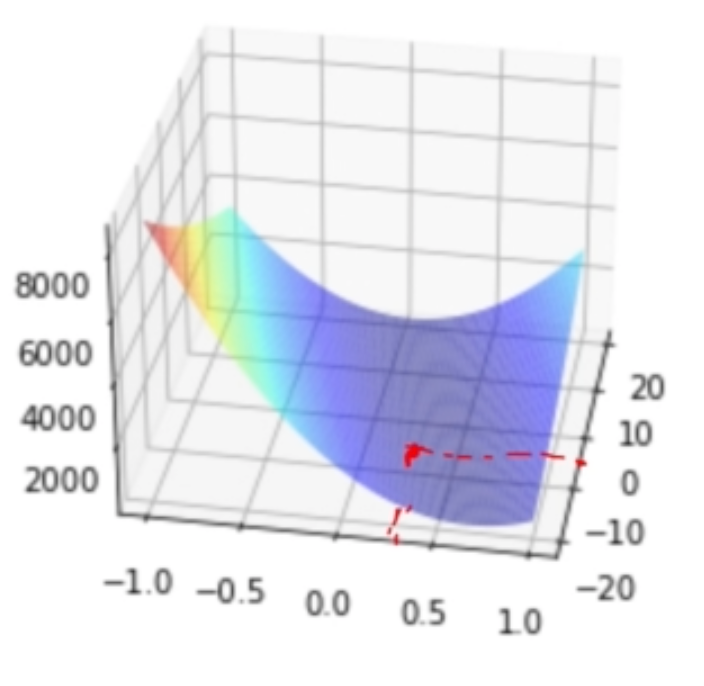

### 最後にコードクリーン

In [49]:
# θ0とθ1の初期値を更新
theta_0_init = -5
theta_1_init = -0.5


# パラメータ更新の関数の定義
def update_theta0(theta_0, theta_1, x, y, alpha=0.05):
    """
    最急降下法の式で、θ0を更新する関数
    Args:
        theta_0:　線形回帰の切片係数 
        theta_1:　線形回帰の傾き係数
        x:　x (ex: x = df['space'].values）
        y:　y (ex: y = df['rent'].values)
        alpha: 学習率
    Returns:
        theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)
    """
    return theta_0 - alpha * 2 * np.mean((theta_0 + theta_1 * x) - y)


def update_theta1(theta_0, theta_1, x, y, alpha=0.05):
    """
    最急降下法の式で、θ0を更新する関数
    Args:
        theta_0:　線形回帰の傾き係数 
        theta_1:　線形回帰の切片係数
        x:　x (ex: x = df['space'].values）
        y:　y (ex: y = df['rent'].values)
        alpha: 学習率
    Returns:
        theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)
    """
    return theta_1 - alpha * 2 * np.mean(((theta_0 + theta_1 * x) - y) * x)


# イテレーション数と学習率αの設定
epochs = 100000  # 10万回
alpha = 0.00005

theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0_init)
theta_1_hist.append(theta_1_init)

for _ in range(epochs):
    # theta_0とtheta_1に格納するのは、theta_0_hist,theta_1_histの最後の値[-1]
    updated_theta0 = update_theta0(theta_0=theta_0_hist[-1], theta_1=theta_1_hist[-1], x=x, y=y, alpha=alpha)
    updated_theta1 = update_theta1(theta_0=theta_0_hist[-1], theta_1=theta_1_hist[-1], x=x, y=y, alpha=alpha)
    theta_0_hist.append(updated_theta0)
    theta_1_hist.append(updated_theta1)    

## 結果を描画

- それぞれのθ0とθ1における損失関数の推移を計算
- θ0とθ1の推移を損失関数に合わせて描画
- θ0とθ1の推移を等高線で描画
- 得られたθ0とθ1で回帰直線を描画

### それぞれのθ0とθ1における損失関数の推移を計算

In [50]:
# zipをつかうとやりやすい
a = [1, 2, 3]
b = [10, 20, 30]

list(zip(a, b))

[(1, 10), (2, 20), (3, 30)]

In [51]:
# cost_func関数を使って各theta_0とtheta_1の損失関数を計算
cost_hist = [cost_func(*param, x=x, y=y) for param in zip(theta_0_hist, theta_1_hist)]

### θ0とθ1の推移を損失関数に合わせて描画

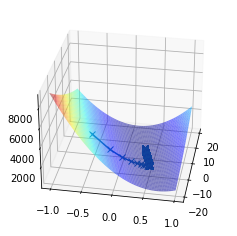

In [52]:
# 損失関数可視化
ax = plt.axes(projection='3d')
ax.plot(theta_0_hist, theta_1_hist, cost_hist, 'x-')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)

plt.gca().invert_xaxis()
ax.view_init(elev=30, azim=10)

### θ0とθ1の推移を等高線で描画

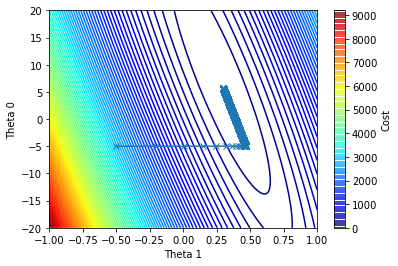

In [53]:
# 3Dではなく等高線を描画する
# 等高線を描画
contour = plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')

# x軸とy軸のラベルを追加
plt.xlabel('Theta 1')
plt.ylabel('Theta 0')

# カラーバーを追加
plt.colorbar(contour, label='Cost')

plt.show()

### 得られたθ0とθ1で回帰直線を描画

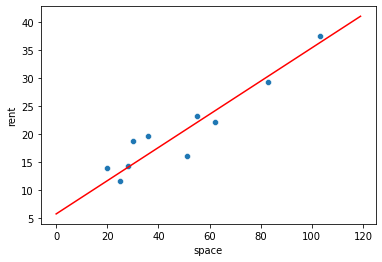

In [54]:
# spaceとrentの散布図
sns.scatterplot(x='space', y='rent', data=df)
# 最急降下法による線形回帰直線を可視化
x_values = np.arange(120)
y_values = theta_0_hist[-1] + theta_1_hist[-1]*x_values
plt.plot(x_values, y_values, '-', color='red')

In [55]:
x_values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])

In [56]:
y_values

array([ 5.69231358,  5.98953305,  6.28675251,  6.58397198,  6.88119144,
        7.17841091,  7.47563037,  7.77284984,  8.0700693 ,  8.36728877,
        8.66450823,  8.9617277 ,  9.25894716,  9.55616663,  9.85338609,
       10.15060556, 10.44782502, 10.74504449, 11.04226395, 11.33948342,
       11.63670288, 11.93392235, 12.23114181, 12.52836128, 12.82558074,
       13.12280021, 13.42001967, 13.71723913, 14.0144586 , 14.31167806,
       14.60889753, 14.90611699, 15.20333646, 15.50055592, 15.79777539,
       16.09499485, 16.39221432, 16.68943378, 16.98665325, 17.28387271,
       17.58109218, 17.87831164, 18.17553111, 18.47275057, 18.76997004,
       19.0671895 , 19.36440897, 19.66162843, 19.9588479 , 20.25606736,
       20.55328683, 20.85050629, 21.14772576, 21.44494522, 21.74216469,
       22.03938415, 22.33660362, 22.63382308, 22.93104255, 23.22826201,
       23.52548148, 23.82270094, 24.1199204 , 24.41713987, 24.71435933,
       25.0115788 , 25.30879826, 25.60601773, 25.90323719, 26.20

# Section4 正規方程式

# 正規方程式のスクラッチ実装

1. Xを作成
2. yとXを使って正規方程式でθを求める
3. 結果を最急降下法と比較する形で等高線で描画

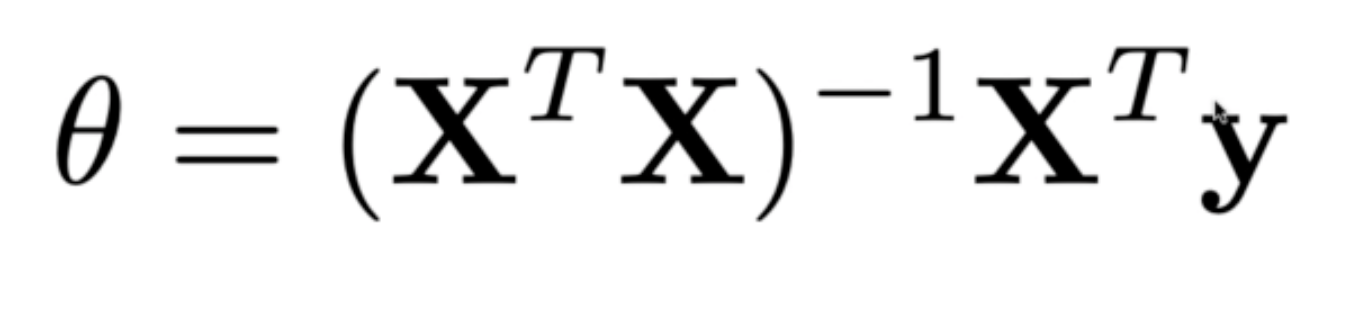


In [57]:
ｄｆ

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


In [58]:
x

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103])

In [59]:
ｙ

array([13.9588237 , 11.53380496, 14.26954729, 18.7226796 , 19.60267397,
       16.06816636, 23.18359859, 22.21259504, 29.35701011, 37.56512884])

## Xを作成

In [60]:
# θ0の係数部：要素が1の行ベクトルを作成
one = np.ones(len(x))

# xで行でマージする：vstackをつかう
X = np.vstack([one, x]).T 

In [61]:
X

array([[  1.,  20.],
       [  1.,  25.],
       [  1.,  28.],
       [  1.,  30.],
       [  1.,  36.],
       [  1.,  51.],
       [  1.,  55.],
       [  1.,  62.],
       [  1.,  83.],
       [  1., 103.]])

## yとXを使って正規方程式でθを求める

In [62]:
# 正規方程式でθを解く
best_theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y.T)

以下は、与えられた式の各要素の説明です：

1. `np.linalg.inv`: NumPyの`linalg`モジュールは線形代数関数を提供します。`inv`関数は、与えられた行列の逆行列を計算します。逆行列は、元の行列と掛け合わせると単位行列になる行列です。この関数を使用して、\( (X^T X)^{-1} \) を計算します。
2. `X.T`: NumPyの多次元配列オブジェクトに対して、転置行列を取得するための属性です。`X`の転置行列は、`X`の行と列を入れ替えた行列です。これにより、式で \( X^T \) を表現します。
3. `dot`: NumPyの配列オブジェクトに対して、行列積を計算するためのメソッドです。行列積は、2つの行列を掛け合わせた結果の行列です。式では、\( X^T \times X \) と \( (X^T X)^{-1} \times X^T \) の計算に使用されます。
4. `y.T`: NumPyの多次元配列オブジェクトに対して、転置行列を取得するための属性です。ベクトル `y` の転置行列は、`y` の要素を1行に配置した行列です。これにより、式で \( y^T \) を表現します。

これらの要素を組み合わせることで、最適なパラメータベクトル \( \theta \) を計算します。

In [63]:
best_theta

array([7.0962325 , 0.27487161])

In [64]:
X.T

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [ 20.,  25.,  28.,  30.,  36.,  51.,  55.,  62.,  83., 103.]])

In [65]:
X.T.dot(X)

array([[1.0000e+01, 4.9300e+02],
       [4.9300e+02, 3.0973e+04]])

## 最急降下法と比較

In [66]:
# 正規方程式
best_theta

array([7.0962325 , 0.27487161])

In [67]:
# 最急降下法
print(theta_0_hist[-1])
print(theta_1_hist[-1])

5.692313583745944
0.2972194648547114


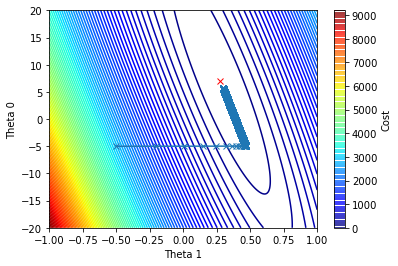

In [68]:
# 等高線を描画
contour = plt.contour(theta_1_ax.T, theta_0_ax.T, Z, 100, cmap='jet')
plt.plot(theta_1_hist, theta_0_hist, 'x-')

# 正規方程式で算出したθをプロットで描画
plt.plot(best_theta[1], best_theta[0], 'x', color='red')

# x軸とy軸のラベルを追加
plt.xlabel('Theta 1')
plt.ylabel('Theta 0')

# カラーバーを追加
plt.colorbar(contour, label='Cost')

plt.show()

# scikit-learnで線形回帰

機械学習ライブラリ
- scikit-learn
- import sklearn

線形回帰
- 内部では正規方程式を使っている
- sklearn.linear_model.Regressionクラス
    1. インスタンス生成
    2. .fit(X,y)メソッドで学習(Xは行列の形.DataFrameでも可)
    3. .prediict(X)で予測
- .coef_および.intercept_でパラメータθを取得可能

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
model = LinearRegression()

In [71]:
model

LinearRegression()

In [72]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


In [74]:
x

array([ 20,  25,  28,  30,  36,  51,  55,  62,  83, 103])

In [75]:
y

array([13.9588237 , 11.53380496, 14.26954729, 18.7226796 , 19.60267397,
       16.06816636, 23.18359859, 22.21259504, 29.35701011, 37.56512884])

In [85]:
# xを２次元のarrayにする
X = x.reshape(-1, 1)

In [86]:
X

array([[ 20],
       [ 25],
       [ 28],
       [ 30],
       [ 36],
       [ 51],
       [ 55],
       [ 62],
       [ 83],
       [103]])

In [81]:
print(x.shape, X.shape)

(10,) (10, 1)


In [82]:
# .fitメソッドで学習
model.fit(X, y)

LinearRegression()

In [84]:
# .predictで予測
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [87]:
# 傾きの算出
model.coef_

array([0.27487161])

In [90]:
# 切片の算出
model.intercept_

7.0962324999088295

### コードクリーン

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = df['space'].values
y = df['rent'].values

X = x.reshape(-1, 1)

model.fit(X, y)

LinearRegression()

In [93]:
model.predict(X)

array([12.59366469, 13.96802274, 14.79263756, 15.34238078, 16.99161044,
       21.11468458, 22.21417102, 24.13827229, 29.91057608, 35.40800827])

In [94]:
y

array([13.9588237 , 11.53380496, 14.26954729, 18.7226796 , 19.60267397,
       16.06816636, 23.18359859, 22.21259504, 29.35701011, 37.56512884])

<AxesSubplot:>

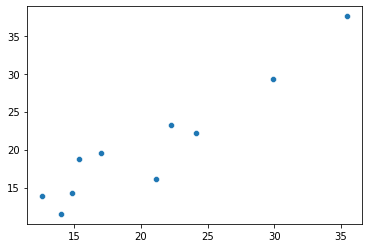

In [98]:
sns.scatterplot(x=model.predict(X), y=y )